In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

from scipy.stats import beta
from scipy.stats import betabinom, binom

In [2]:
# Set Parameters
n_samples = 1000000
num_bins = 20
length_strings = 3
p=0.5
n_binomial = 100
n_discrete = 10
lambda_param = 4

In [3]:
def plot_distribution(dist, n_samples, title, num_bins):
    weights = np.ones_like(dist)/float(len(dist))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    fig.suptitle(title,fontsize=20)
    count, bins, ignored = ax1.hist(dist, num_bins, weights=weights)
    #ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    ax1.set_title('Probability Distribution',fontsize=18)
    ax1.set_ylabel('Frequency',fontsize=16)
    ax1.set_xlabel('Value',fontsize=16)
    plt.setp(ax1.get_yticklabels(), fontsize=14)
    plt.setp(ax1.get_xticklabels(), fontsize=14)
    y = np.arange(0,n_samples)
    ax2.scatter(y,dist,s=10)
    ax2.set_title('Sample Values',fontsize=18)
    ax2.set_ylabel('Sample Value',fontsize=16)
    ax2.set_xlabel('Sample Number',fontsize=16)
    plt.setp(ax2.get_xticklabels(), fontsize=14)
    plt.setp(ax2.get_yticklabels(), fontsize=14)

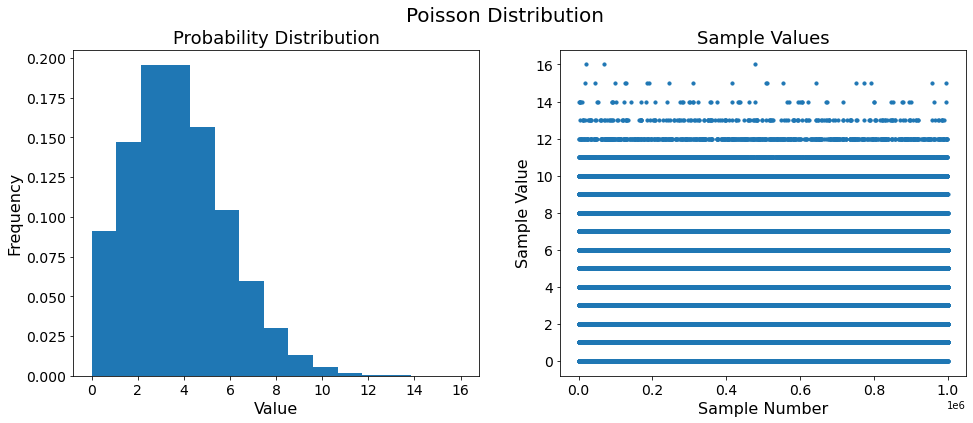

In [4]:
def poission_distribution(n_samples=n_samples, lambda_param=lambda_param, display = True):
    poission =  np.random.poisson(lambda_param, n_samples)
    if display==True:
        plot_distribution(poission, n_samples, "Poisson Distribution",15)
    return poission
poission = poission_distribution()

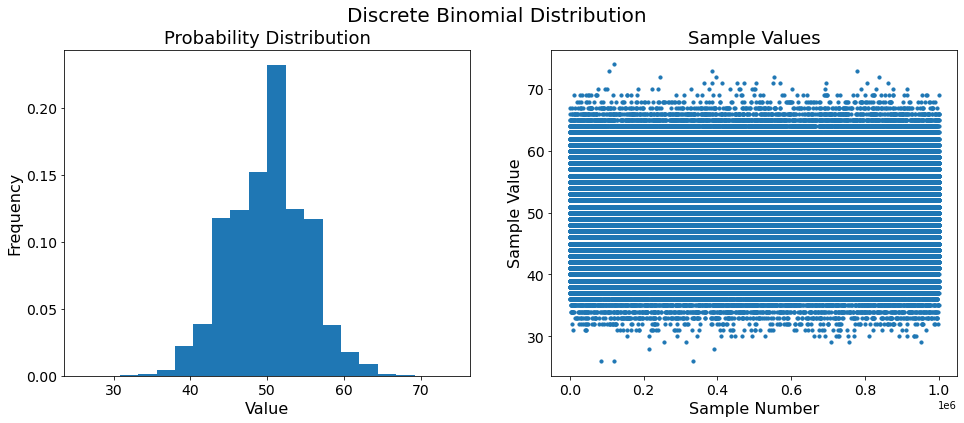

In [5]:
def discrete_binomial_distribution(n_samples=n_samples, p=p, n=n_binomial, display = True):
    discrete_binomial_distribution = binom.rvs(n, p, size=n_samples)
    if display==True:
        plot_distribution(discrete_binomial_distribution, n_samples, "Discrete Binomial Distribution", num_bins)
        
    return discrete_binomial_distribution
discrete_binomial = discrete_binomial_distribution()

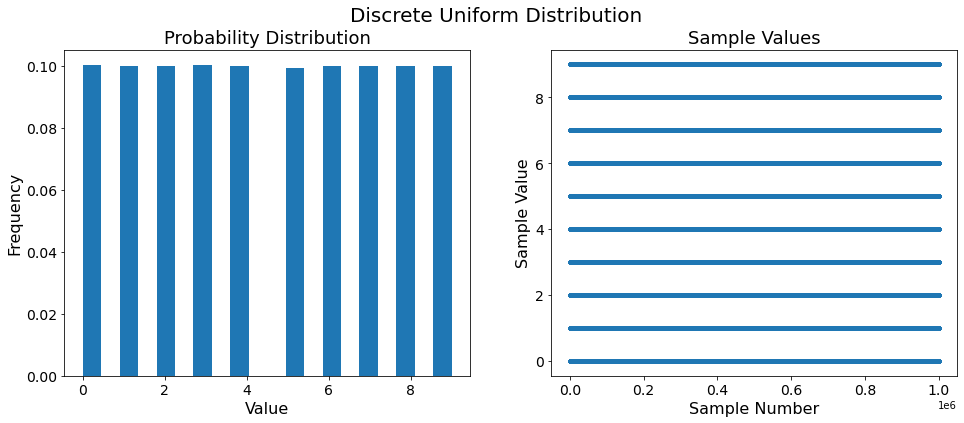

In [6]:
def discrete_uniform_distribution(n_samples=n_samples, n=n_discrete, display = True):
    discrete_uniform_distribution = np.random.randint(n, size=n_samples)
    
    if display == True:
        plot_distribution(discrete_uniform_distribution, n_samples, "Discrete Uniform Distribution", num_bins)
        
    return discrete_uniform_distribution
discrete_uniform = discrete_uniform_distribution()

In [7]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples, freq="30min").to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [8]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

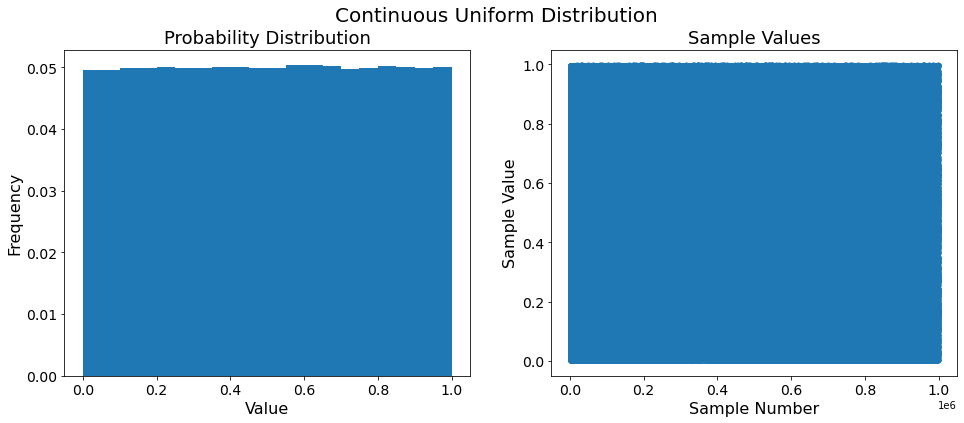

In [9]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        plot_distribution(sample_uniform, n_samples, "Continuous Uniform Distribution", num_bins)
    return sample_uniform

sample_uniform=uniform_distribution()

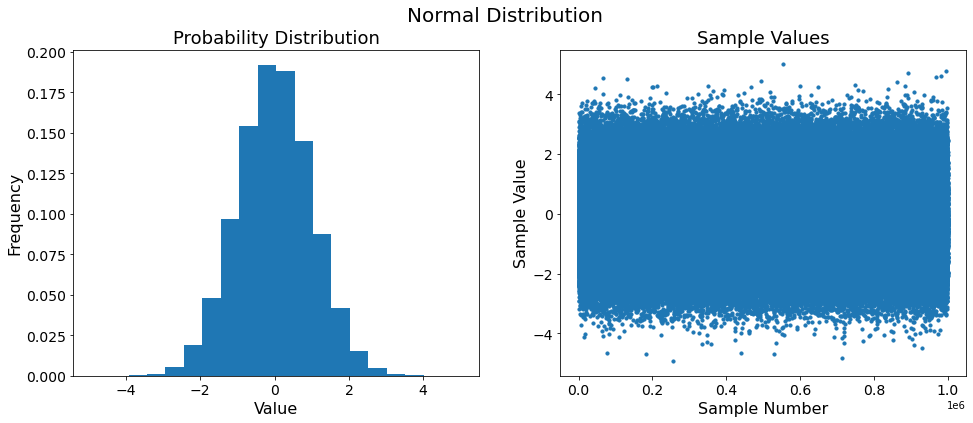

In [10]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        plot_distribution(sample_normal, n_samples, "Normal Distribution", num_bins)
    return sample_normal

sample_normal = normal_distribution()

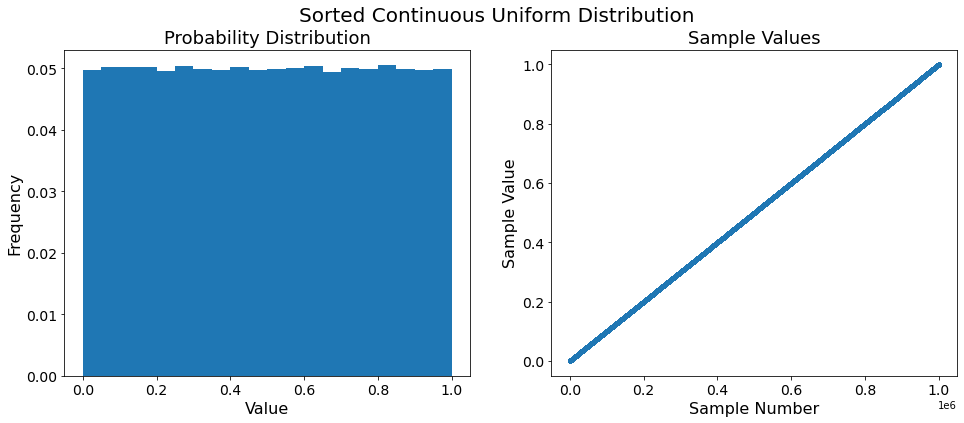

In [11]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        plot_distribution(sample_uniform_sorted, n_samples, "Sorted Continuous Uniform Distribution", num_bins)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

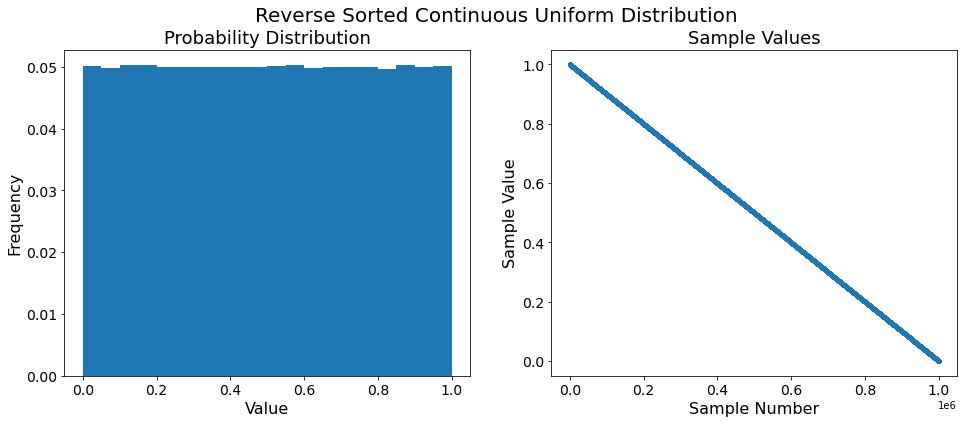

In [12]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        plot_distribution(sample_uniform_reverse_sorted, n_samples, "Reverse Sorted Continuous Uniform Distribution", num_bins)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

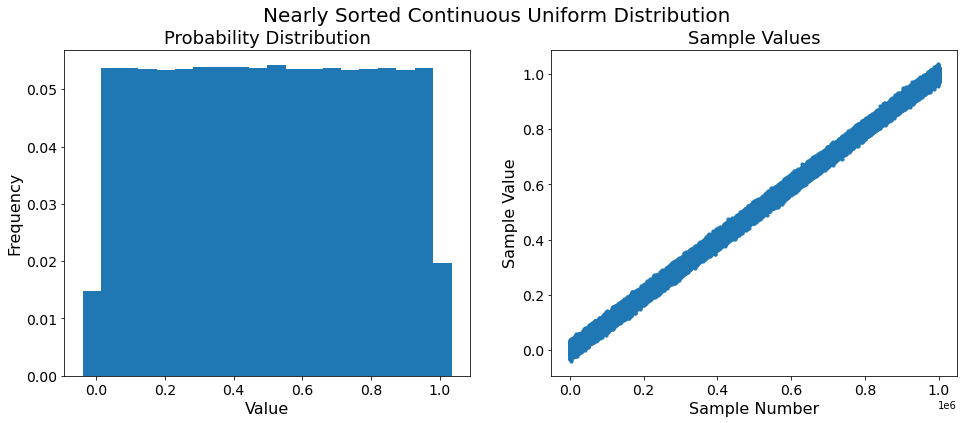

In [13]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        plot_distribution(sample_uniform_nearly_sorted, n_samples, "Nearly Sorted Continuous Uniform Distribution", num_bins)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

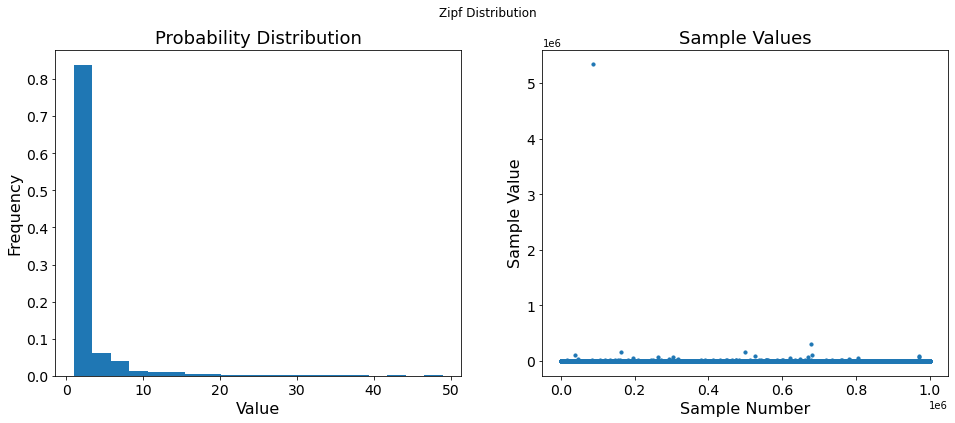

In [14]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        
        weights = np.ones_like(sample_zipf[sample_zipf<50])/float(len(sample_zipf[sample_zipf<50]))
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
        fig.suptitle('Zipf Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 20, weights=weights)
        #ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax1.set_title('Probability Distribution',fontsize=18)
        ax1.set_ylabel('Frequency',fontsize=16)
        ax1.set_xlabel('Value',fontsize=16)
        plt.setp(ax1.get_yticklabels(), fontsize=14)
        plt.setp(ax1.get_xticklabels(), fontsize=14)
        y = np.arange(0,n_samples)
        ax2.scatter(y,sample_zipf,s=10)
        ax2.set_title('Sample Values',fontsize=18)
        ax2.set_ylabel('Sample Value',fontsize=16)
        ax2.set_xlabel('Sample Number',fontsize=16)
        plt.setp(ax2.get_xticklabels(), fontsize=14)
        plt.setp(ax2.get_yticklabels(), fontsize=14)

    return sample_zipf
sample_zipf = zipf_distribution()

In [15]:
def create_df_distribution(n_samples=n_samples, dist_type="Uniform"):
    df_distribion = pd.DataFrame().astype(np.float64)
    if dist_type == "Uniform":
        sample_uniform= uniform_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform"] = sample_uniform
    if dist_type == "Normal":
        sample_normal = normal_distribution(display=False, n_samples=n_samples)
        df_distribion["Normal"] = sample_normal
    if dist_type == "Uniform_Sorted":
        sample_uniform_sorted = uniform_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Sorted"] = sample_uniform_sorted
    if dist_type == "Uniform_Reverse_Sorted":
        sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    if dist_type == "Uniform_Nearly_Sorted":
        sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    if dist_type == "Zipf":
        sample_zipf = zipf_distribution(display=False, n_samples=n_samples)
        df_distribion["Zipf"] = sample_zipf
    if dist_type == "Dates":
        sample_dates = create_dates(n_samples=n_samples)
        df_distribion["Dates"] = sample_dates
    if dist_type == "Strings":
        sample_strings = create_strings(n_samples=n_samples)
        df_distribion["Strings"] = sample_strings
    if dist_type == "Discrete_Uniform":
        sample_discrete = discrete_uniform_distribution(n_samples=n_samples, n=n_discrete, display=False)
        df_distribion["Discrete_Uniform"] = sample_discrete
    if dist_type == "Discrete_Binomial":
        sample_bionmial = discrete_binomial_distribution(n_samples=n_samples, p=p, n=n_binomial, display=False)
        df_distribion["Discrete_Binomial"] = sample_bionmial
    if dist_type == "Poisson":
        poisson =  poission_distribution(n_samples=n_samples, lambda_param=lambda_param, display = False)
        df_distribion["Poisson"] = poisson
              
    return df_distribion

In [16]:
def quick_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="quicksort")
    return sorted_df
def merge_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="mergesort")
    return sorted_df
def heap_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="heapsort")
    return sorted_df

choices = [quick_sort,merge_sort,heap_sort]
choices_names = ["quicksort","mergesort","heapsort"]

In [17]:
def evaluate_sorts(distribution_type="Uniform", second_col = None, repetitions=50):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(repetitions):
                distribion = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                start_time = time.perf_counter()
                #sorted_df = distribion.sort_values([distribution_type],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(distribion, [distribution_type])
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(int(repetitions/2)):
                distribion_1 = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                distribion_2 = create_df_distribution(n_samples=n_samples, dist_type=second_col)
                df_distribions = pd.concat([distribion_1, distribion_2], axis=1)
                #print(df_distribions)
                start_time = time.perf_counter()
                #sorted_df = df_distribions.sort_values([distribution_type, second_col],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(df_distribions, [distribution_type, second_col])
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    return measures

In [18]:
print("Discrete_Uniform")
df_discrete_uniform = evaluate_sorts(distribution_type="Discrete_Uniform")
df_discrete_uniform.to_csv("DATA/df_discrete_uniform_1000000.csv")

Discrete_Uniform
The time of quicksort is 0.0577516040000004
It has a STD of 0.0032292964940345012
The time of mergesort is 0.09605353600000008
It has a STD of 0.001084030034779274
The time of heapsort is 0.09177488800000021
It has a STD of 0.0014081425915926401


In [19]:
print("Discrete_Binomial")
df_discrete_binomial = evaluate_sorts(distribution_type="Discrete_Binomial")
df_discrete_binomial.to_csv("DATA/df_discrete_binomial_1000000.csv")

Discrete_Binomial
The time of quicksort is 0.06236531800000023
It has a STD of 0.0010836042574089515
The time of mergesort is 0.11424663999999979
It has a STD of 0.0017953609082296568
The time of heapsort is 0.10990415399999919
It has a STD of 0.0019427414129735991


In [20]:
print("Poisson")
df_poisson= evaluate_sorts(distribution_type="Poisson")
df_poisson.to_csv("DATA/df_poisson_1000000.csv")

Poisson
The time of quicksort is 0.05246119399999969
It has a STD of 0.0005830386280199245
The time of mergesort is 0.102860107999999
It has a STD of 0.001257621696671737
The time of heapsort is 0.0915069059999999
It has a STD of 0.0011089674578461585


In [21]:
print("Dates")
df_dates = evaluate_sorts(distribution_type="Dates")
df_dates.to_csv("DATA/df_dates_1000000.csv")

Dates
The time of quicksort is 0.14701369799999894
It has a STD of 0.0013465079517737933
The time of mergesort is 0.16079385399999865
It has a STD of 0.003357441683438672
The time of heapsort is 0.38320814999999814
It has a STD of 0.0042169938766061085


In [22]:
print("Strings")
df_strings = evaluate_sorts(distribution_type="Strings")
df_strings.to_csv("DATA/df_strings_1000000.csv")

Strings
The time of quicksort is 1.4200737160000017
It has a STD of 0.012982681506905491
The time of mergesort is 1.337255579999992
It has a STD of 0.018895448733083055
The time of heapsort is 2.909428790000038
It has a STD of 0.06235939123190011


In [23]:
print("Uniform")
df_uniform = evaluate_sorts(distribution_type="Uniform")
df_uniform.to_csv("DATA/df_uniform_1000000.csv")

Uniform
The time of quicksort is 0.14212382600000636
It has a STD of 0.0013157231924277627
The time of mergesort is 0.15079753600000914
It has a STD of 0.0016387179831555195
The time of heapsort is 0.35710404599998585
It has a STD of 0.0036108506747793037


In [24]:
print("Normal")
df_normal = evaluate_sorts(distribution_type="Normal")
df_normal.to_csv("DATA/df_normal_1000000.csv")

Normal
The time of quicksort is 0.14234084799999436
It has a STD of 0.0013953887369990879
The time of mergesort is 0.15072564600002353
It has a STD of 0.001662610576336864
The time of heapsort is 0.3558223640000051
It has a STD of 0.0036570079990238783


In [25]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution_type="Uniform_Sorted")
df_uniform_sorted.to_csv("DATA/df_uniform_sorted_1000000.csv")

Uniform_Sorted
The time of quicksort is 0.03342347000000245
It has a STD of 0.00042717162277350833
The time of mergesort is 0.024269884000000276
It has a STD of 0.0005297690856960707
The time of heapsort is 0.08721132800000304
It has a STD of 0.0005943274198827056


In [26]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution_type="Uniform_Reverse_Sorted")
df_uniform_reverse_sorted.to_csv("DATA/df_uniform_reverse_sorted_1000000.csv")

Uniform_Reverse_Sorted
The time of quicksort is 0.03985551399999622
It has a STD of 0.0008839360599071657
The time of mergesort is 0.024432058000020334
It has a STD of 0.0002391787031407168
The time of heapsort is 0.09688530600002196
It has a STD of 0.0010129050118315689


In [27]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution_type="Uniform_Nearly_Sorted")
df_uniform_nearly_sorted.to_csv("DATA/df_uniform_nearly_sorted_1000000.csv")

Uniform_Nearly_Sorted
The time of quicksort is 0.09901629400001638
It has a STD of 0.0011404386048498637
The time of mergesort is 0.1029078100000288
It has a STD of 0.001103692403739297
The time of heapsort is 0.18074270600000544
It has a STD of 0.004597718375388532


In [28]:
print("Zipf")
df_zipf = evaluate_sorts(distribution_type="Zipf")
df_zipf.to_csv("DATA/df_zipf_1000000.csv")

Zipf
The time of quicksort is 0.04817693199998757
It has a STD of 0.0008549870643262504
The time of mergesort is 0.08178957399999036
It has a STD of 0.000879046946142985
The time of heapsort is 0.07206282599999213
It has a STD of 0.00181216673224167


In [29]:
print("Zipf + Normal")
df_zipf_normal = evaluate_sorts(distribution_type="Zipf", second_col="Normal")
df_zipf_normal.to_csv("DATA/df_zipf_normal_1000000.csv")

Zipf + Normal
The time of quicksort is 0.6334523400000035
It has a STD of 0.006641579955348629
The time of mergesort is 0.6325125519999983
It has a STD of 0.004784346094067259
The time of heapsort is 0.6315528119999817
It has a STD of 0.002484984707291076


In [30]:
print("Zipf + Discrete_Binomial")
df_zipf_binomial = evaluate_sorts(distribution_type="Zipf", second_col="Discrete_Binomial")
df_zipf_binomial.to_csv("DATA/df_zipf_binomial_1000000.csv")

Zipf + Discrete_Binomial
The time of quicksort is 0.09819238400000359
It has a STD of 0.0008335776727740143
The time of mergesort is 0.09824637200001235
It has a STD of 0.001031821974758784
The time of heapsort is 0.09809502000000066
It has a STD of 0.0008509610106003555


In [31]:
print("Zipf + Discrete_Uniform")
df_zipf_discrete_uniform = evaluate_sorts(distribution_type="Zipf", second_col="Discrete_Uniform")
df_zipf_discrete_uniform.to_csv("DATA/df_zipf_discrete_uniform_1000000.csv")

Zipf + Discrete_Uniform
The time of quicksort is 0.0958948480000072
It has a STD of 0.0009273245883016753
The time of mergesort is 0.09595107200004349
It has a STD of 0.0008238927325652706
The time of heapsort is 0.09653381199999785
It has a STD of 0.0012959280045534624


In [32]:
print("Zipf + Poisson")
df_zipf_poisson = evaluate_sorts(distribution_type="Zipf", second_col="Poisson")
df_zipf_poisson.to_csv("DATA/df_zipf_poisson_1000000.csv")

Zipf + Poisson
The time of quicksort is 0.09531908400001157
It has a STD of 0.0012859801282257772
The time of mergesort is 0.0948626879999938
It has a STD of 0.0008834197291672473
The time of heapsort is 0.09527196000000003
It has a STD of 0.0009666543874333092


In [33]:
print("Zipf + Dates")
df_zipf_dates = evaluate_sorts(distribution_type="Zipf", second_col="Dates")
df_zipf_dates.to_csv("DATA/df_zipf_dates_1000000.csv")

Zipf + Dates
The time of quicksort is 0.62255131599999
It has a STD of 0.0033864524221627877
The time of mergesort is 0.6243028239999876
It has a STD of 0.004027335920978762
The time of heapsort is 0.6242140359999939
It has a STD of 0.005259083026525495


In [34]:
print("Zipf + Strings")
df_zipf_strings = evaluate_sorts(distribution_type="Zipf", second_col="Strings")
df_zipf_strings.to_csv("DATA/df_zipf_strings_1000000.csv")

Zipf + Strings
The time of quicksort is 0.5220871400000032
It has a STD of 0.01114883071472497
The time of mergesort is 0.5254144880000058
It has a STD of 0.0054903651724768675
The time of heapsort is 0.5237224760000027
It has a STD of 0.0036614547684597973


In [35]:
print("Discrete_Uniform + Poisson")
df_discrete_poisson = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Poisson")
df_discrete_poisson.to_csv("DATA/df_discrete_poisson_1000000.csv")

Discrete_Uniform + Poisson
The time of quicksort is 0.08718142799993074
It has a STD of 0.0015597747810669079
The time of mergesort is 0.08771804800002428
It has a STD of 0.0019950319207015506
The time of heapsort is 0.08717261600004349
It has a STD of 0.001778178815936922


In [36]:
print("Discrete_Uniform + Strings")
df_discrete_strings = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Strings")
df_discrete_strings.to_csv("DATA/df_discrete_strings_1000000.csv")

Discrete_Uniform + Strings
The time of quicksort is 0.5517640160000156
It has a STD of 0.019514571824068724
The time of mergesort is 0.5515894120000121
It has a STD of 0.00966034292673608
The time of heapsort is 0.5507891560000098
It has a STD of 0.005230329327643101


In [37]:
print("Discrete_Uniform + Uniform_Reverse_Sorted")
df_discrete_uniform_reverse_sorted = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Uniform_Reverse_Sorted")
df_discrete_uniform_reverse_sorted.to_csv("DATA/df_discrete_uniform_reverse_sorted_1000000.csv")

Discrete_Uniform + Uniform_Reverse_Sorted
The time of quicksort is 0.37186659200000577
It has a STD of 0.008924912140335854
The time of mergesort is 0.3675050120000196
It has a STD of 0.006754475980112691
The time of heapsort is 0.36663505599992274
It has a STD of 0.0030980859318316366


In [38]:
print("Discrete_Uniform + Uniform_Nearly_Sorted")
df_discrete_uniform_nearly_sorted = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Uniform_Nearly_Sorted")
df_discrete_uniform_nearly_sorted.to_csv("DATA/df_discrete_uniform_nearly_sorted_1000000.csv")

Discrete_Uniform + Uniform_Nearly_Sorted
The time of quicksort is 0.49772632000001976
It has a STD of 0.002344431038709235
The time of mergesort is 0.49637334399998506
It has a STD of 0.00332621876157741
The time of heapsort is 0.4993125360000704
It has a STD of 0.006149677957478017


In [39]:
df_discrete_uniform = pd.read_csv("DATA/df_discrete_uniform_1000000.csv")
df_discrete_binomial = pd.read_csv("DATA/df_discrete_binomial_1000000.csv")
df_poisson = pd.read_csv("DATA/df_poisson_1000000.csv")
df_dates = pd.read_csv("DATA/df_dates_1000000.csv")
df_strings = pd.read_csv("DATA/df_strings_1000000.csv")
df_uniform = pd.read_csv("DATA/df_uniform_1000000.csv")
df_normal = pd.read_csv("DATA/df_normal_1000000.csv")
df_uniform_sorted = pd.read_csv("DATA/df_uniform_sorted_1000000.csv")
df_uniform_reverse_sorted = pd.read_csv("DATA/df_uniform_reverse_sorted_1000000.csv")
df_uniform_nearly_sorted = pd.read_csv("DATA/df_uniform_nearly_sorted_1000000.csv")
df_zipf = pd.read_csv("DATA/df_zipf_1000000.csv")
df_zipf_normal = pd.read_csv("DATA/df_zipf_normal_1000000.csv")
df_zipf_binomial = pd.read_csv("DATA/df_zipf_binomial_1000000.csv")
df_zipf_discrete_uniform = pd.read_csv("DATA/df_zipf_discrete_uniform_1000000.csv")
df_zipf_poisson = pd.read_csv("DATA/df_zipf_poisson_1000000.csv")
df_zipf_dates = pd.read_csv("DATA/df_zipf_dates_1000000.csv")
df_zipf_strings = pd.read_csv("DATA/df_zipf_strings_1000000.csv")
df_discrete_poisson = pd.read_csv("DATA/df_discrete_poisson_1000000.csv")
df_discrete_strings = pd.read_csv("DATA/df_discrete_strings_1000000.csv")
df_discrete_uniform_reverse_sorted = pd.read_csv("DATA/df_discrete_uniform_reverse_sorted_1000000.csv")
df_discrete_uniform_nearly_sorted = pd.read_csv("DATA/df_discrete_uniform_nearly_sorted_1000000.csv")

In [40]:

# for visulaization purposes
def replace_outlier(val, mean, std, const=1):
    if val > mean + const*std:
        return mean + const*std 
    elif val < mean - const*std:
        return mean - const*std
    return val


def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo,algo_name):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle(algo_name)
    count, bins, ignored = ax1.hist(sort_dist, 20)
    ax2.plot(sort_dist)
    plt.show()
def plot_runtimes_together(df, bins = 6,title=None):
    for column in df.columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        df[column] = df[column].map(lambda x: replace_outlier(x, mean, std_dev))
    weights_quicksort = np.ones_like(df["quicksort"])/float(len(df["quicksort"]))
    weights_mergesort = np.ones_like(df["mergesort"])/float(len(df["mergesort"]))
    weights_heapsort = np.ones_like(df["heapsort"])/float(len(df["heapsort"]))
    plt.figure(figsize=(16,6))
    #bins = np.histogram(np.hstack((df["quicksort"], df["mergesort"], df["heapsort"])), bins=bins)[1]
    _, bin_edges_qs = np.histogram(df["quicksort"], density=True)
    _, bin_edges_ms = np.histogram(df["mergesort"], density=True)
    _, bin_edges_hs = np.histogram(df["heapsort"], density=True)
    plt.hist(df["quicksort"], bin_edges_qs, alpha = 0.5, label='quick sort',weights=weights_quicksort)
    plt.hist(df["mergesort"], bin_edges_ms, alpha = 0.5, label='merge sort',weights=weights_mergesort)
    plt.hist(df["heapsort"], bin_edges_hs, alpha = 0.5, label='heap sort',weights=weights_heapsort)
    plt.legend(loc='upper right',fontsize=26)
    plt.title(title,fontsize=26)
    plt.ylabel("Frequency",fontsize=26)
    plt.xlabel("Runtime in seconds",fontsize=26)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)
    plt.show()

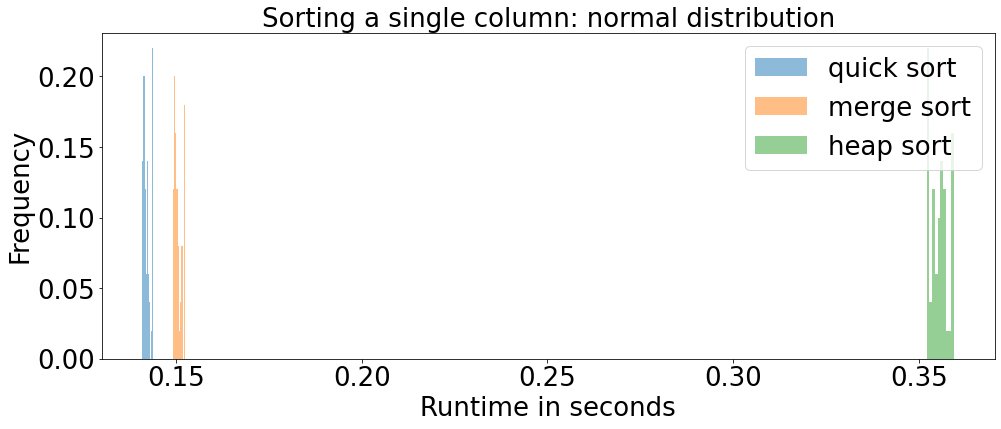

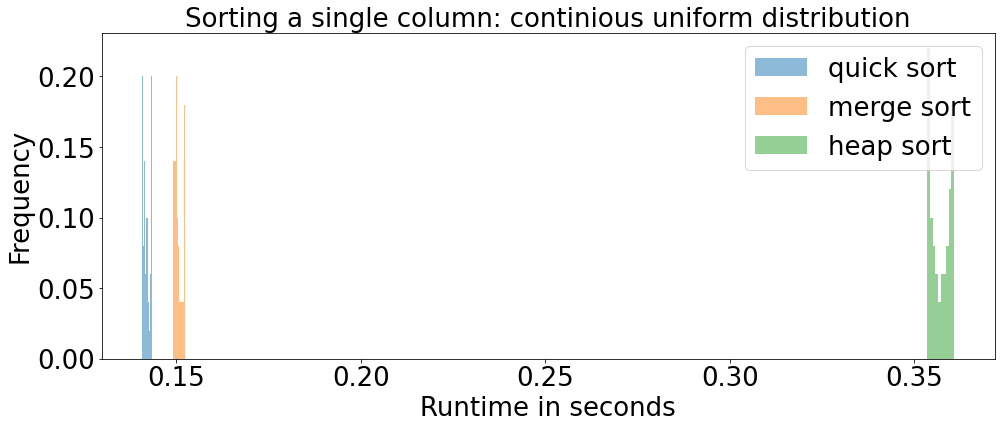

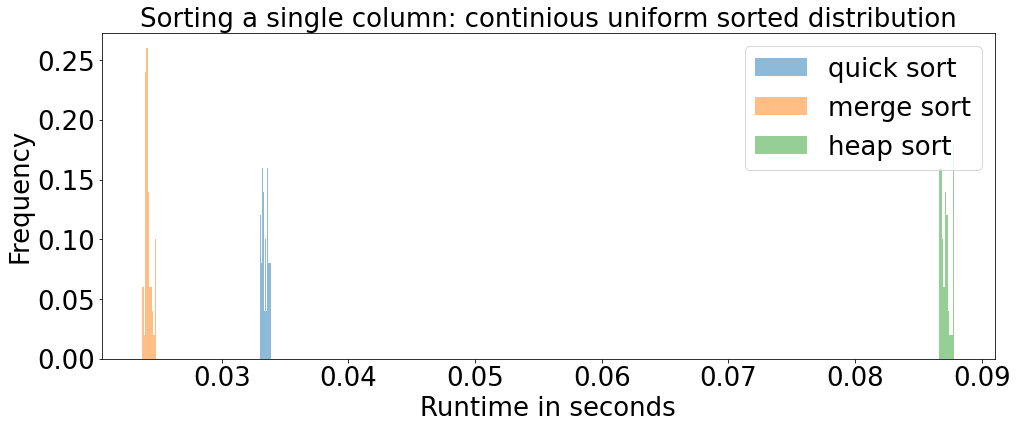

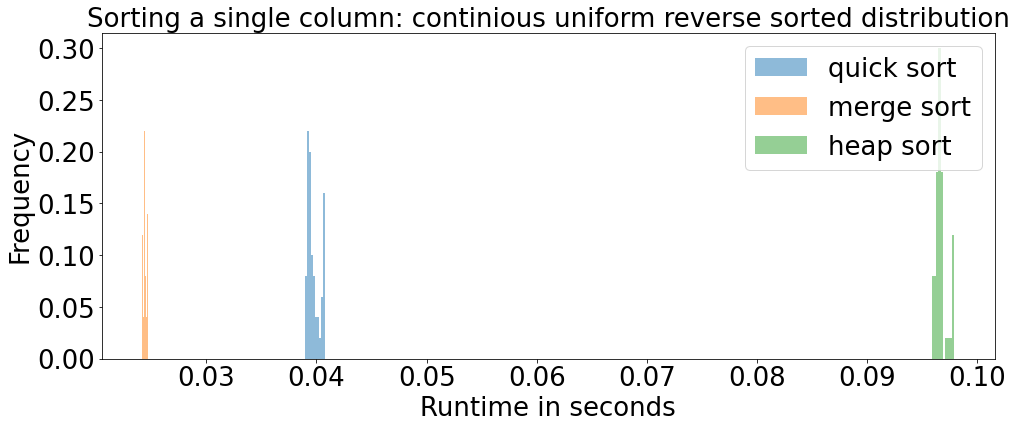

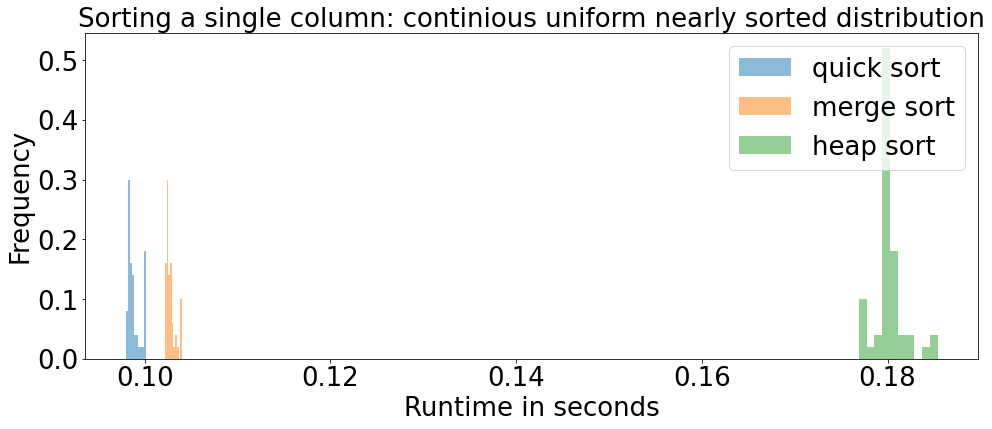

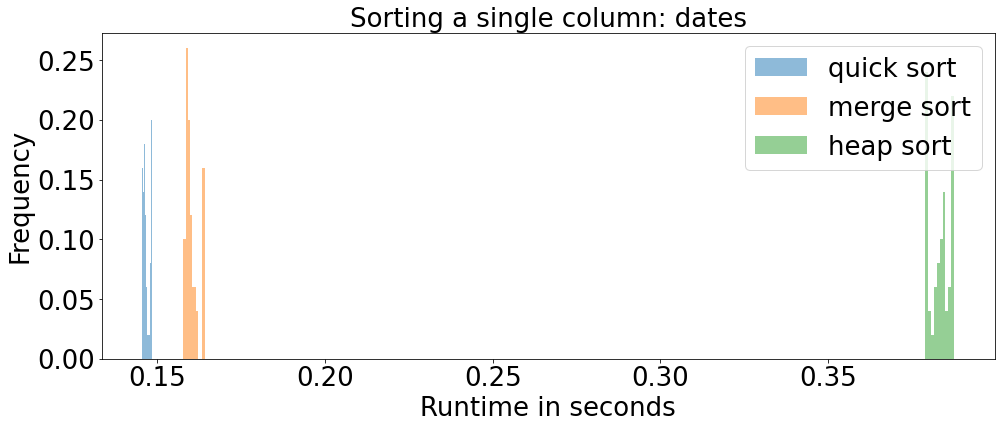

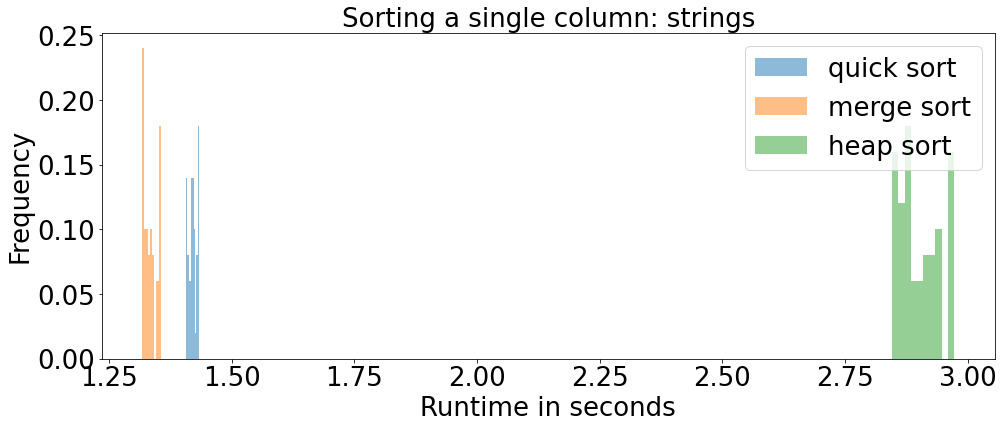

In [41]:
plot_runtimes_together(df_normal, title="Sorting a single column: normal distribution")
plot_runtimes_together(df_uniform, title="Sorting a single column: continious uniform distribution")
plot_runtimes_together(df_uniform_sorted, title="Sorting a single column: continious uniform sorted distribution")
plot_runtimes_together(df_uniform_reverse_sorted, title="Sorting a single column: continious uniform reverse sorted distribution")
plot_runtimes_together(df_uniform_nearly_sorted, title="Sorting a single column: continious uniform nearly sorted distribution")
plot_runtimes_together(df_dates, title="Sorting a single column: dates")
plot_runtimes_together(df_strings, title="Sorting a single column: strings")

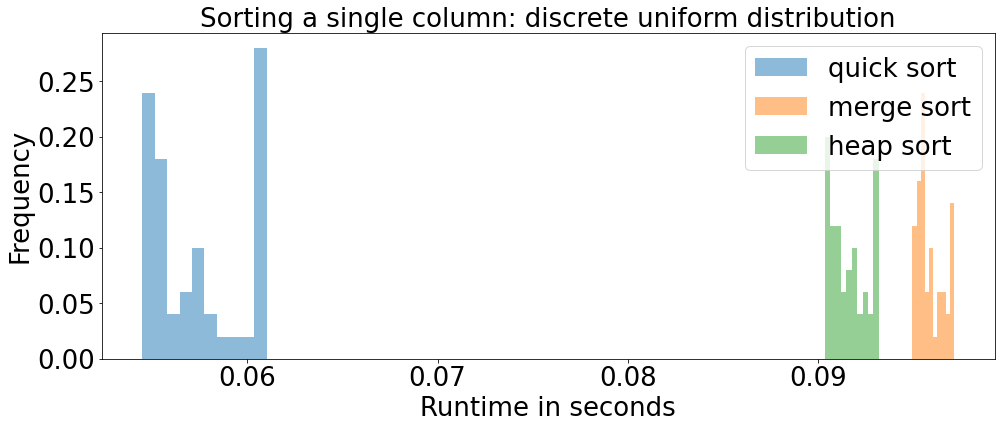

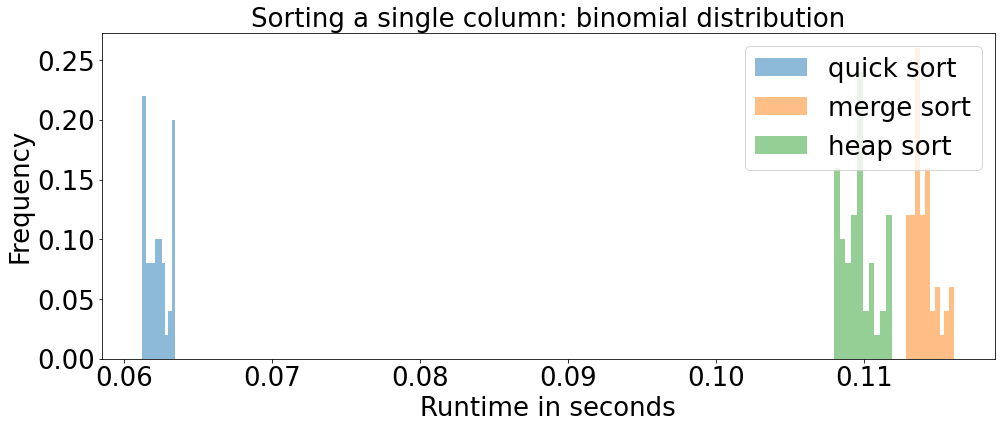

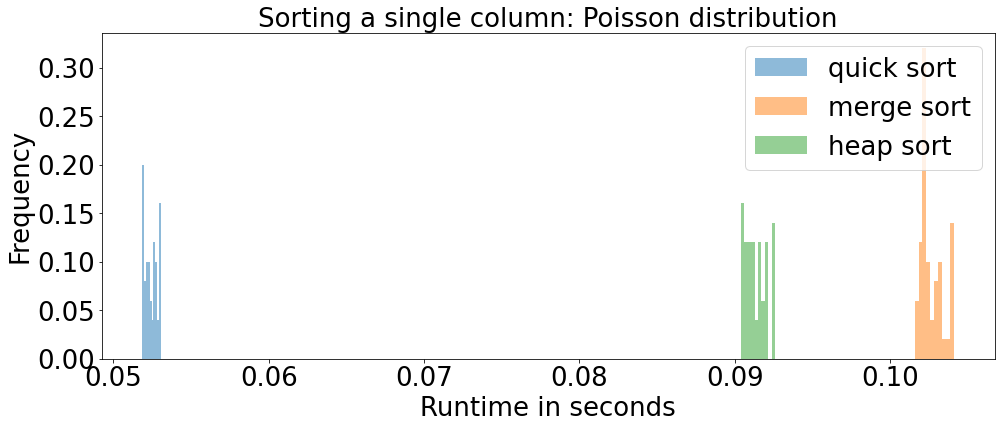

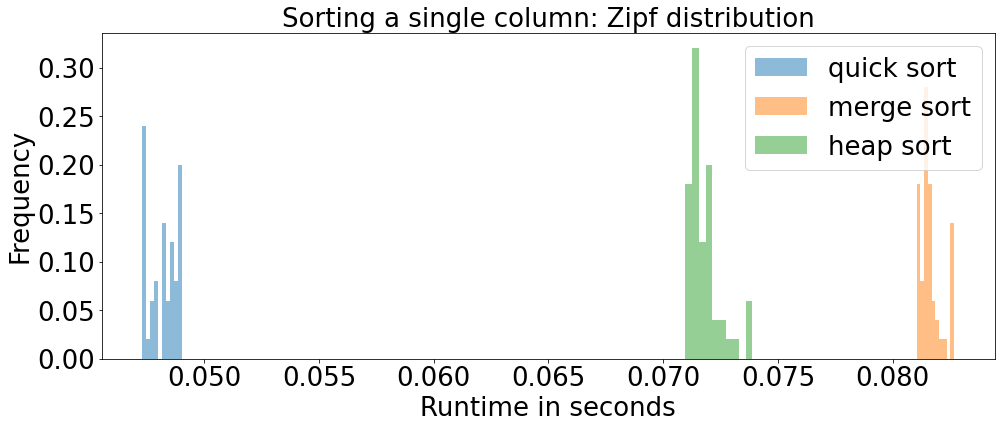

In [42]:
plot_runtimes_together(df_discrete_uniform, title="Sorting a single column: discrete uniform distribution")
plot_runtimes_together(df_discrete_binomial, title="Sorting a single column: binomial distribution")
plot_runtimes_together(df_poisson, title="Sorting a single column: Poisson distribution")
plot_runtimes_together(df_zipf, title="Sorting a single column: Zipf distribution")

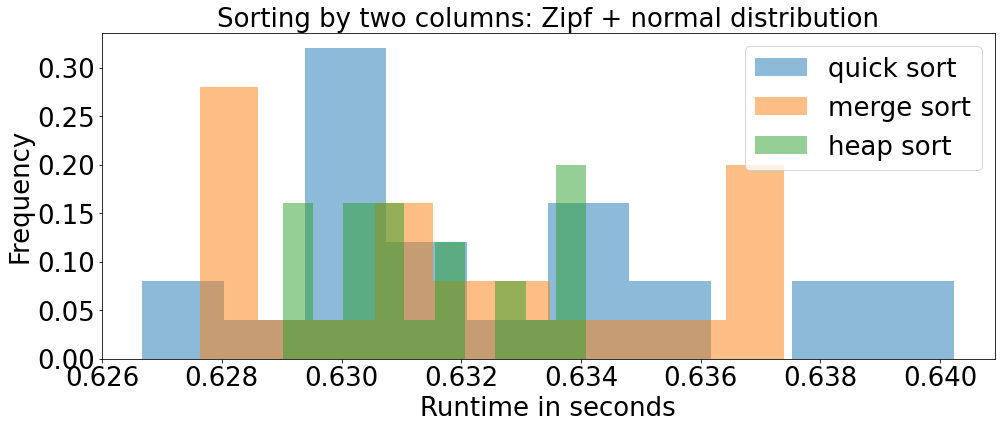

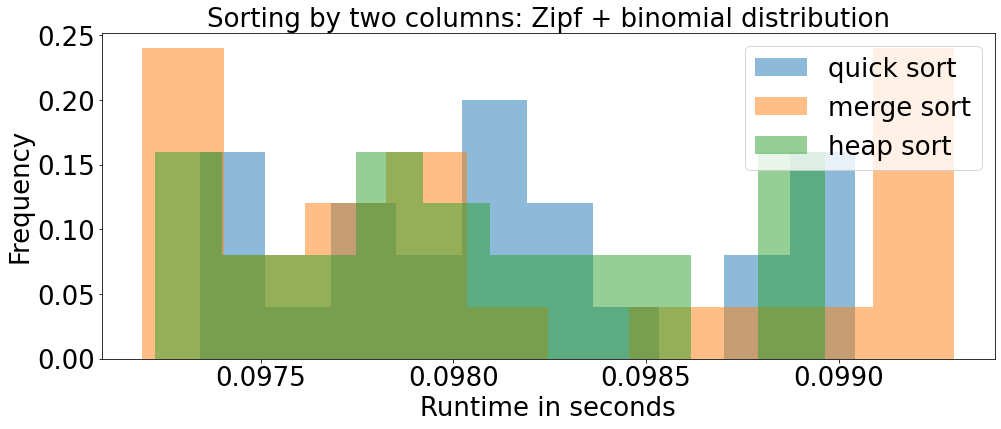

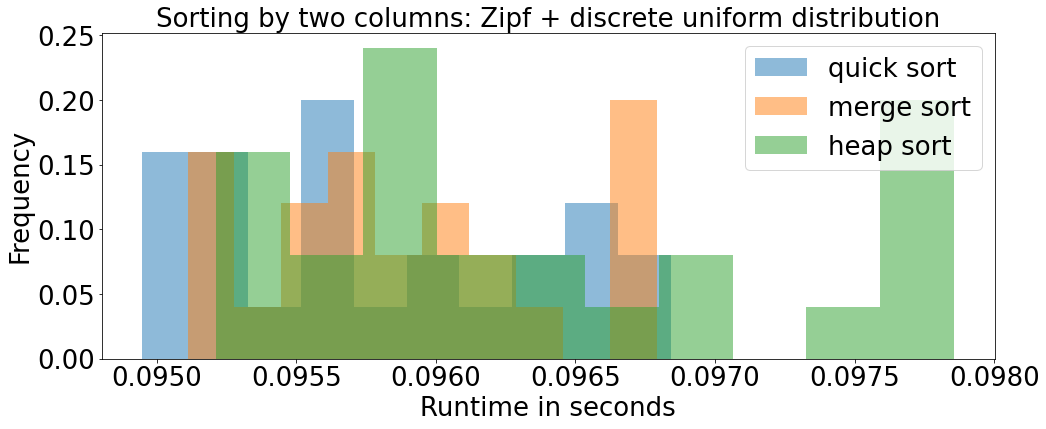

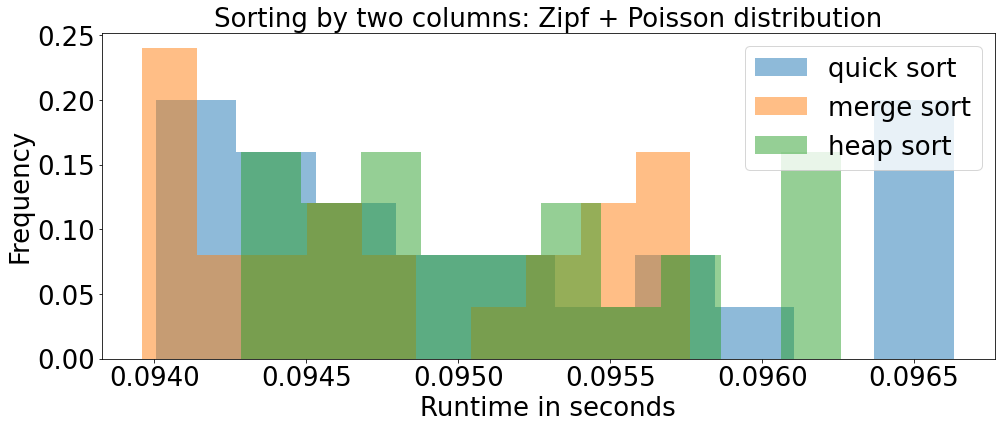

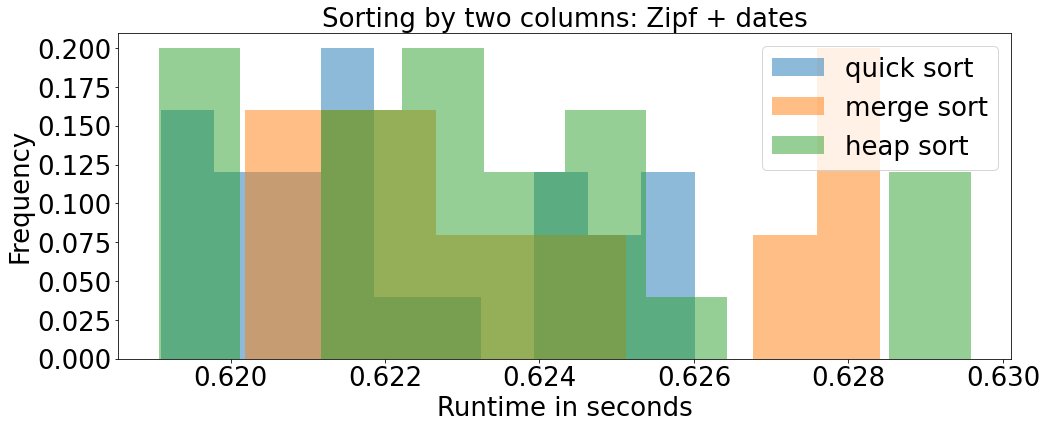

In [43]:
plot_runtimes_together(df_zipf_normal, title="Sorting by two columns: Zipf + normal distribution")
plot_runtimes_together(df_zipf_binomial, title="Sorting by two columns: Zipf + binomial distribution")
plot_runtimes_together(df_zipf_discrete_uniform, title="Sorting by two columns: Zipf + discrete uniform distribution")
plot_runtimes_together(df_zipf_poisson, title="Sorting by two columns: Zipf + Poisson distribution")
plot_runtimes_together(df_zipf_dates, title="Sorting by two columns: Zipf + dates")

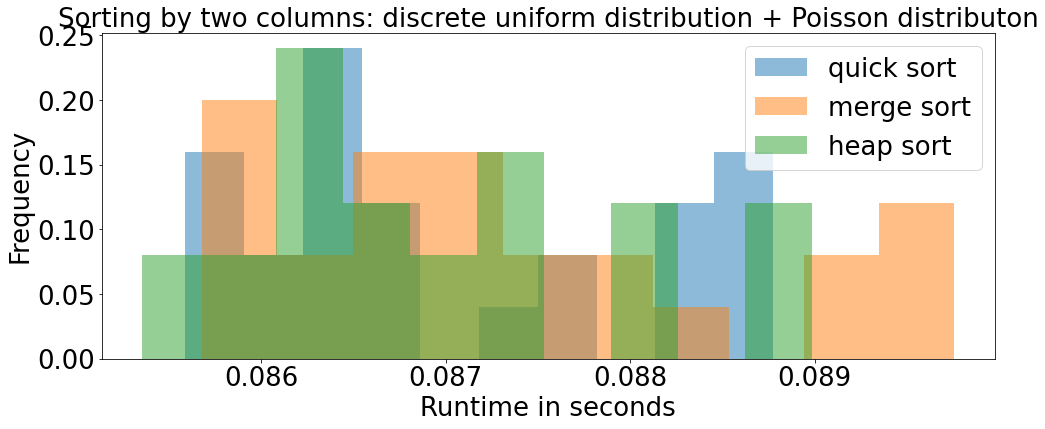

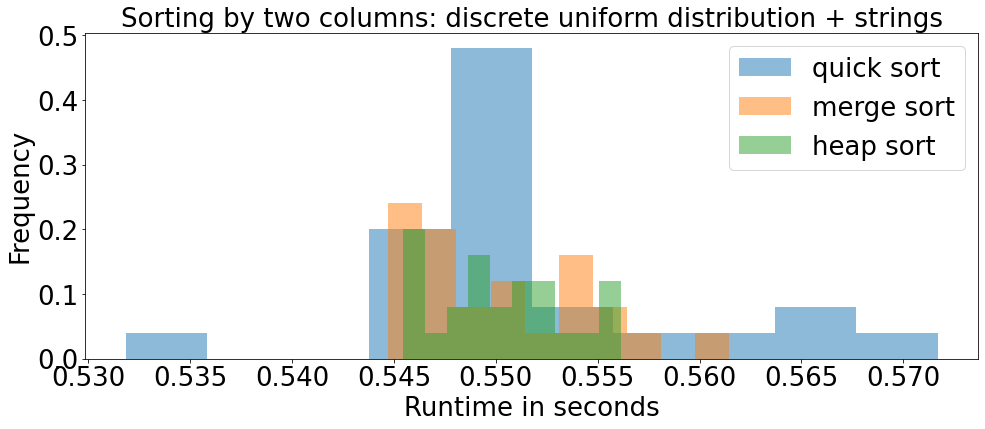

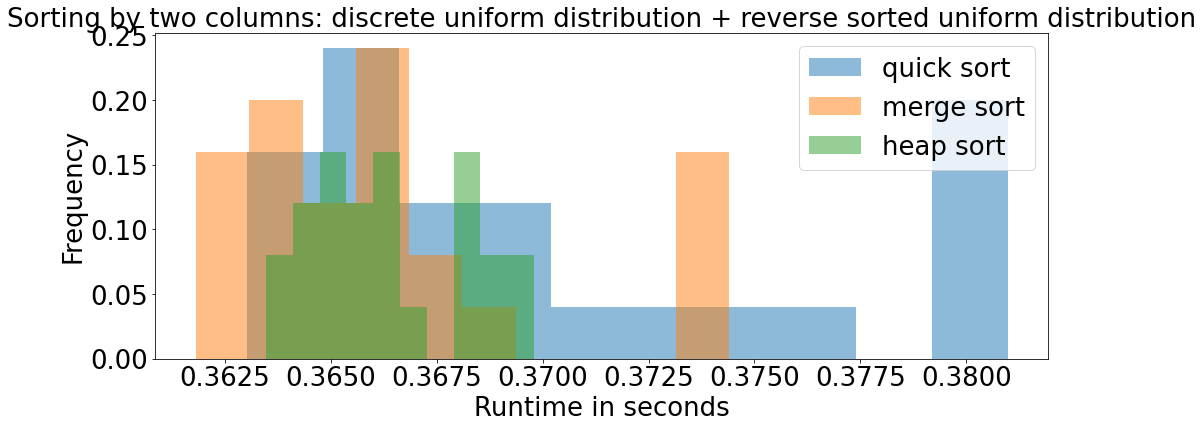

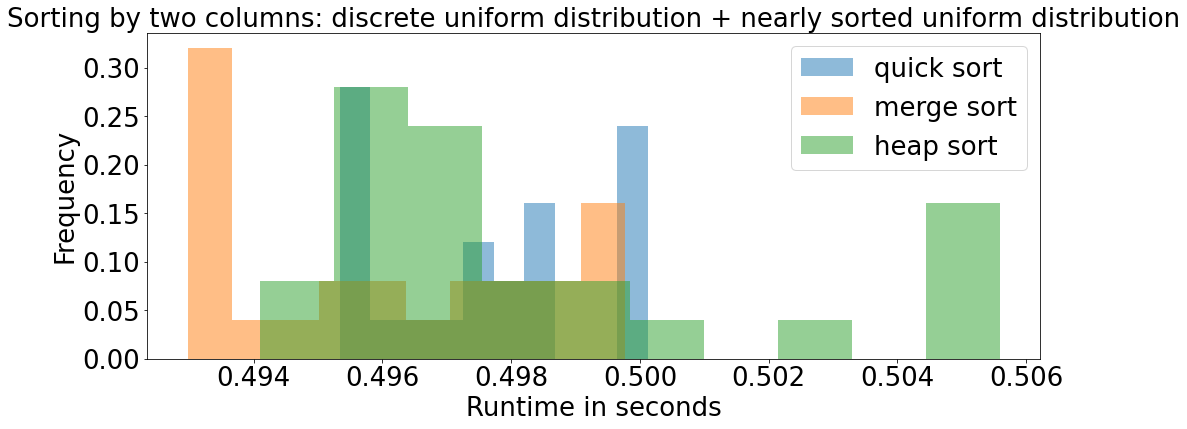

In [44]:
plot_runtimes_together(df_discrete_poisson, title="Sorting by two columns: discrete uniform distribution + Poisson distributon")
plot_runtimes_together(df_discrete_strings, title="Sorting by two columns: discrete uniform distribution + strings")
plot_runtimes_together(df_discrete_uniform_reverse_sorted, title="Sorting by two columns: discrete uniform distribution + reverse sorted uniform distribution")
plot_runtimes_together(df_discrete_uniform_nearly_sorted, title="Sorting by two columns: discrete uniform distribution + nearly sorted uniform distribution")